In [1]:
!git clone https://github.com/iiscleap/Coswara-Data.git

Cloning into 'Coswara-Data'...
remote: Enumerating objects: 701, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 701 (delta 10), reused 38 (delta 3), pack-reused 613
Receiving objects: 100% (701/701), 12.71 GiB | 25.78 MiB/s, done.
Resolving deltas: 100% (232/232), done.
Checking out files: 100% (161/161), done.


In [2]:
%cd /content/Coswara-Data/

/content/Coswara-Data


In [3]:
%ls

20200413/  20200430/  20200720/  20200919/  20210406/  20210630/
20200415/  20200502/  20200803/  20200930/  20210419/  20210714/
20200416/  20200504/  20200814/  20201012/  20210426/  combined_data.csv
20200417/  20200505/  20200820/  20201031/  20210507/  csv_labels_legend.json
20200418/  20200525/  20200824/  20201130/  20210523/  extract_data.py
20200419/  20200604/  20200901/  20201221/  20210603/  LICENSE.md
20200424/  20200707/  20200911/  20210206/  20210618/  README.md


In [4]:
!python extract_data.py

Streaming output truncated to the last 5000 lines.
20200417/Xq0KTVn9T2TQhl644ZuZHT5ByQy2/counting-fast.wav
20200417/Xq0KTVn9T2TQhl644ZuZHT5ByQy2/breathing-deep.wav
20200417/Xq0KTVn9T2TQhl644ZuZHT5ByQy2/cough-heavy.wav
20200417/Xq0KTVn9T2TQhl644ZuZHT5ByQy2/cough-shallow.wav
20200417/jzZNRqxGsTXZVZJbipHEyBaGPAI2/counting-normal.wav
20200417/jzZNRqxGsTXZVZJbipHEyBaGPAI2/metadata.json
20200417/jzZNRqxGsTXZVZJbipHEyBaGPAI2/vowel-o.wav
20200417/jzZNRqxGsTXZVZJbipHEyBaGPAI2/vowel-a.wav
20200417/jzZNRqxGsTXZVZJbipHEyBaGPAI2/vowel-e.wav
20200417/jzZNRqxGsTXZVZJbipHEyBaGPAI2/breathing-shallow.wav
20200417/jzZNRqxGsTXZVZJbipHEyBaGPAI2/counting-fast.wav
20200417/jzZNRqxGsTXZVZJbipHEyBaGPAI2/breathing-deep.wav
20200417/jzZNRqxGsTXZVZJbipHEyBaGPAI2/cough-heavy.wav
20200417/jzZNRqxGsTXZVZJbipHEyBaGPAI2/cough-shallow.wav
20200417/aESHvWgJIodaDacHGg6i3o05bYo2/counting-normal.wav
20200417/aESHvWgJIodaDacHGg6i3o05bYo2/metadata.json
20200417/aESHvWgJIodaDacHGg6i3o05bYo2/vowel-o.wav
20200417/aESHvWgJIodaDa

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd


##Lets Analyse the Data first

In [3]:
cdd=os.getcwd()
cdd

'/content'

In [4]:
os.chdir('/content/Coswara-Data/Extracted_data')
os.getcwd()

'/content/Coswara-Data/Extracted_data'

In [5]:
covid_status_list=[]

In [9]:
for i in os.listdir():
  for j in os.listdir(os.path.join('/content/Coswara-Data/Extracted_data',i)):
    if (j=='.DS_Store' or j=='._.DS_Store' or j=='20200419.csv'):
      continue
    tp=os.path.join('/content/Coswara-Data/Extracted_data',i,j,'metadata.json')

    f = open(tp)
    data = json.load(f)
    covid_status_list.append(data['covid_status'])







In [10]:
len(covid_status_list)

1947

In [11]:
sform=set(covid_status_list)
sform

{'healthy',
 'no_resp_illness_exposed',
 'positive_asymp',
 'positive_mild',
 'positive_moderate',
 'recovered_full',
 'resp_illness_not_identified'}

In [12]:
healthy=0
no_resp_illness_exposed=0
positive_asymp=0
positive_mild=0
positive_moderate=0
recovered_full=0
resp_illness_not_identified=0

In [13]:
for i in covid_status_list:
  if i=='healthy':
    healthy+=1
  elif i=='no_resp_illness_exposed':
    no_resp_illness_exposed+=1
  elif i=='positive_asymp':
    positive_asymp+=1
  elif i=='positive_mild':
    positive_mild+=1
  elif i=='positive_moderate':
    positive_moderate+=1
  elif i=='recovered_full':
    recovered_full+=1
  elif i=='resp_illness_not_identified':
    resp_illness_not_identified+=1
    


In [14]:
final_dict={'healthy':healthy,'no_resp_illness_exposed':no_resp_illness_exposed,'positive_asymp':positive_asymp,'positive_mild':positive_mild,'positive_moderate':positive_moderate,'recovered_full':recovered_full,'resp_illness_not_identified':resp_illness_not_identified}

<BarContainer object of 7 artists>

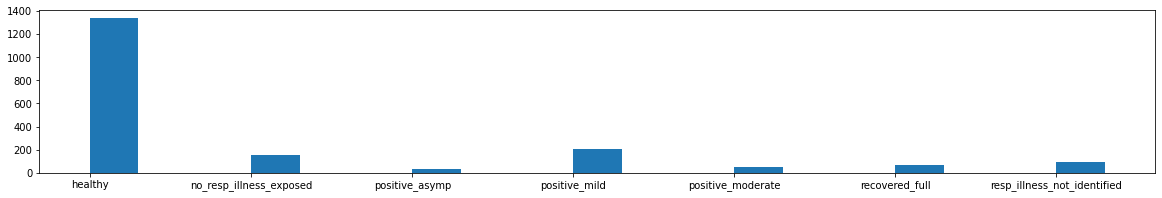

In [15]:
plt.figure(figsize=(20, 3))  # width:20, height:3
plt.bar(final_dict.keys(),final_dict.values(), align='edge', width=0.3)

Here we understand the dataset we got is highly imbalanced. We can solve this problem by either augmenting the existing data or by redcuing the number of healthy audio samples. For now I'll just continue with how the dataset is.

##Consolidating the Data in a useful structure
I will covert all the different wav files into one file for each person


In [16]:
pip install wave

  Created wheel for wave: filename=Wave-0.0.2-py3-none-any.whl size=1238 sha256=9efb5bbe35226403a5cb3b7a18245a7d336d6cf27da4345282b4391e609bde4f
  Stored in directory: /root/.cache/pip/wheels/25/e8/fe/458c7dac00c6abedad6380b9d0ef1a5cbc7c21807df1d30915
Successfully built wave


In [17]:
import wave
def concatenate(wavfiles,wavaddresses,outputfilepath):
  infiles = wavfiles
  outfile = "output.wav"
  data= []
  ctr=0
  for infile in wavaddresses:
    try:
      w = wave.open(wavaddresses[ctr], 'rb')
      ctr+=1
      data.append( [w.getparams(), w.readframes(w.getnframes())] )
      w.close()
    except:
      ctr+=1
      continue  
    
  output = wave.open(os.path.join(outputfilepath,outfile), 'wb')
  output.setparams(data[0][0])
  for i in range(len(data)):
    output.writeframes(data[i][1])
  output.close()

In [18]:
os.listdir()

['20200525',
 '20200415',
 '20200430',
 '20200919',
 '20200824',
 '20200504',
 '20200803',
 '20200720',
 '20210507',
 '20210618',
 '20210714',
 '20200416',
 '20201130',
 '20200419',
 '20210603',
 '20200930',
 '20200604',
 '20200707',
 '20200901',
 '20210630',
 '20200911',
 '20200820',
 '20201012',
 '20210406',
 '20200418',
 '20200413',
 '20200505',
 '20210206',
 '20210419',
 '20200417',
 '20201031',
 '20200424',
 '20200814',
 '20210426',
 '20210523',
 '20201221',
 '20200502']

In [19]:
wav_names=['breathing-deep.wav','breathing-shallow.wav','cough-heavy.wav','cough-shallow.wav','counting-fast.wav','counting-normal.wav','vowel-a.wav','vowel-e.wav','vowel-o.wav']
wav_address=[]
for i in os.listdir():
  for j in os.listdir(os.path.join('/content/Coswara-Data/Extracted_data',i)):
    wav_address=[]
    if (j=='.DS_Store' or j=='._.DS_Store' or j=='20200419.csv'):
      continue
    tp=os.path.join('/content/Coswara-Data/Extracted_data',i,j)
    for k in wav_names:
      wav_address.append(os.path.join(tp,k))
      print(i,j)
    concatenate(wav_names,wav_address,tp)  



Streaming output truncated to the last 5000 lines.
20200417 EPA8c37Cb5e2aaUfisoVCzoxMnT2
20200417 EPA8c37Cb5e2aaUfisoVCzoxMnT2
20200417 EPA8c37Cb5e2aaUfisoVCzoxMnT2
20200417 EPA8c37Cb5e2aaUfisoVCzoxMnT2
20200417 EPA8c37Cb5e2aaUfisoVCzoxMnT2
20200417 L5tZkFTeajV4uDCQnvbWLNoG5az1
20200417 L5tZkFTeajV4uDCQnvbWLNoG5az1
20200417 L5tZkFTeajV4uDCQnvbWLNoG5az1
20200417 L5tZkFTeajV4uDCQnvbWLNoG5az1
20200417 L5tZkFTeajV4uDCQnvbWLNoG5az1
20200417 L5tZkFTeajV4uDCQnvbWLNoG5az1
20200417 L5tZkFTeajV4uDCQnvbWLNoG5az1
20200417 L5tZkFTeajV4uDCQnvbWLNoG5az1
20200417 L5tZkFTeajV4uDCQnvbWLNoG5az1
20200417 ikYIaaUJutT91dYfNqA7iQoAQKN2
20200417 ikYIaaUJutT91dYfNqA7iQoAQKN2
20200417 ikYIaaUJutT91dYfNqA7iQoAQKN2
20200417 ikYIaaUJutT91dYfNqA7iQoAQKN2
20200417 ikYIaaUJutT91dYfNqA7iQoAQKN2
20200417 ikYIaaUJutT91dYfNqA7iQoAQKN2
20200417 ikYIaaUJutT91dYfNqA7iQoAQKN2
20200417 ikYIaaUJutT91dYfNqA7iQoAQKN2
20200417 ikYIaaUJutT91dYfNqA7iQoAQKN2
20200417 gkgap61ehlgkpjvtbEm1EVbhv8j1
20200417 gkgap61ehlgkpjvtbEm1EVbhv8j1

In [6]:
pip install librosa

In [7]:
X=[]
Y=[]

In [8]:
import librosa
for i in os.listdir():
  for j in os.listdir(os.path.join('/content/Coswara-Data/Extracted_data',i)):
    if (j=='.DS_Store' or j=='._.DS_Store' or j=='20200419.csv'):
      continue
    tp=os.path.join('/content/Coswara-Data/Extracted_data',i,j,'metadata.json')
    ap=os.path.join('/content/Coswara-Data/Extracted_data',i,j,'output.wav')

    f = open(tp)
    data = json.load(f)
    
    try:
      librosa_audio_data,librosa_sample_rate=librosa.load(ap,res_type='kaiser_fast')
      X.append(np.mean(librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40).T,axis=0))
      cate=data['covid_status']
      Y.append(cate)
    except:
      continue  

    



In [9]:
X_array=np.array(X)

In [10]:
X_array.shape

(1923, 40)

In [11]:
Y_array=np.array(pd.get_dummies(Y))

In [12]:
Y_array.shape

(1923, 7)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_array,Y_array,test_size=0.2,random_state=0)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [25]:
model=Sequential()
###first layer
model.add(Dense(128,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(7))
model.add(Activation('softmax'))

In [26]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               5248      
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_9 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

In [29]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='SGD')

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 1000
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='content/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/1000
49/49 [==============================] - 1s 7ms/step - loss: 1.1387 - accuracy: 0.6821 - val_loss: 1.1234 - val_accuracy: 0.7013

Epoch 00001: val_loss improved from inf to 1.12336, saving model to content/audio_classification.hdf5
Epoch 2/1000
49/49 [==============================] - 0s 4ms/step - loss: 1.1382 - accuracy: 0.6821 - val_loss: 1.1148 - val_accuracy: 0.7013

Epoch 00002: val_loss improved from 1.12336 to 1.11478, saving model to content/audio_classification.hdf5
Epoch 3/1000
49/49 [==============================] - 0s 4ms/step - loss: 1.1387 - accuracy: 0.6821 - val_loss: 1.1208 - val_accuracy: 0.7013

Epoch 00003: val_loss did not improve from 1.11478
Epoch 4/1000
49/49 [==============================] - 0s 4ms/step - loss: 1.1380 - accuracy: 0.6821 - val_loss: 1.1208 - val_accuracy: 0.7013

Epoch 00004: val_loss did not improve from 1.11478
Epoch 5/1000
49/49 [==============================] - 0s 4ms/step - loss: 1.1397 - accuracy: 0.6821 - val_loss: 1.1064